### Data Prepocessing

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read csv
cust_df = pd.read_csv("german_credit_data.csv")
cust_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# cek missing value
cust_df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [4]:
# Menggati nilai NaN dengan "others"
cust_df["Saving accounts"].replace(np.nan, "others", inplace=True)
cust_df["Checking account"].replace(np.nan, "others", inplace=True)
cust_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,others,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,others,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
# Hapus kolom 
df = cust_df.drop(columns='Unnamed: 0', axis=1)
df.head() 


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,others,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,others,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


#### Exploratory Data Analysis

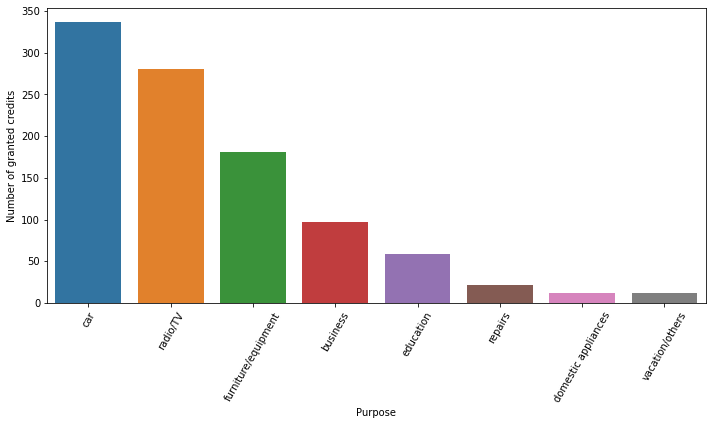

In [6]:
# Barplot 
n_credits = cust_df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

Barplot diatas merupakan barplot yang menunjukkan banyak nya kredit yang dibutuhkan untuk berbagai keperluan.
Dari Barplot diatas ditunjukkan bahwa mobil dan radio/TV memiliki kredit tertinggi dan kredit terendah dimiliki oleh vacation/others

In [7]:
# Boxplot
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=cust_df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

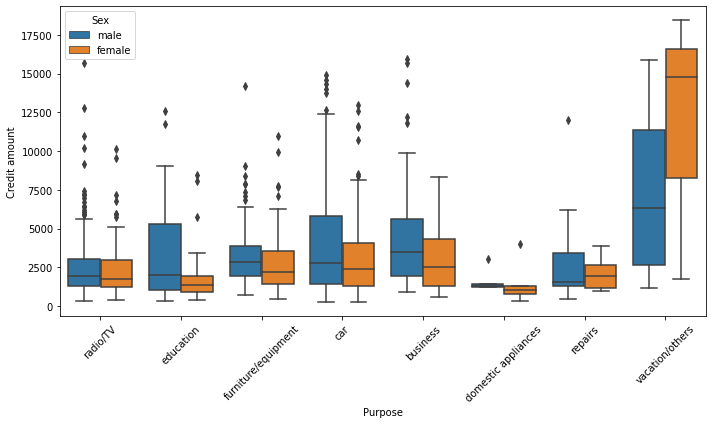

In [8]:
boxes("Purpose","Credit amount","Sex")

Boxplot  diatas menunjukkan perbedaan besarnya credit antara laki-laki dan perempuan untuk tiap keperluan. Jumlah kredit terbesar dimiliki oleh vacation/others dan terkecil oleh domestic appliances. Kebanyakan dari mereka memiliki pencilan di sisi atas kotak (jumlah yang lebih tinggi). Pada kebanyakan kasus tidak ada perbedaan antara laki-laki dan perempuan, hanya pada vacation/others yang terdapat perbedaan besar antara laki-laki dan perempuan.

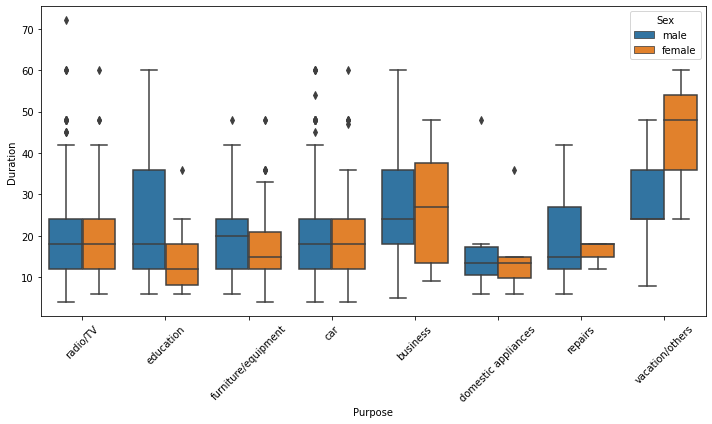

In [9]:
boxes("Purpose","Duration","Sex")

Boxplot diatas menunjukkan perbedaan durasi credit antara laki-laki dan perempuan untuk tiap keperluan. Perbedaan durasi terbesar dimiliki oleh vacation/others dan terkecil oleh domestic appliances. Secara umum tidak banyak perbedan durasi antara laki-laki dan perempuan.

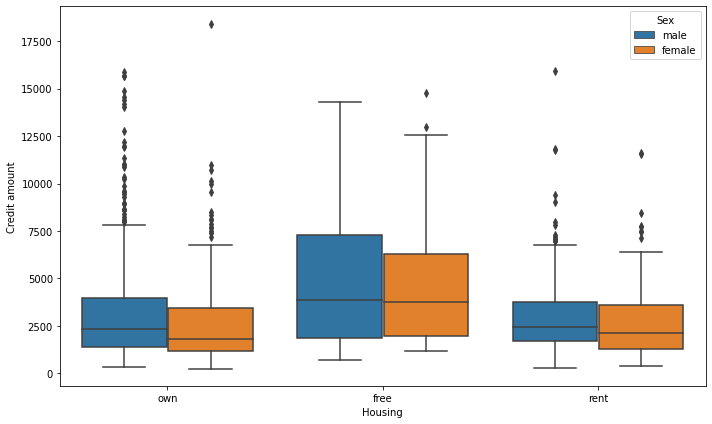

In [10]:
boxes("Housing","Credit amount","Sex",r=0)

Boxplot diatas menunjukkan perbedaan jenis kategori rumah dengan jumlah kredit. secara umum tidak ada perbedaan yang besar,  meskipun jumlah kredit yang sedikit lebih besar dimiliki oleh masyarakat yang memiliki jenis rumah free.

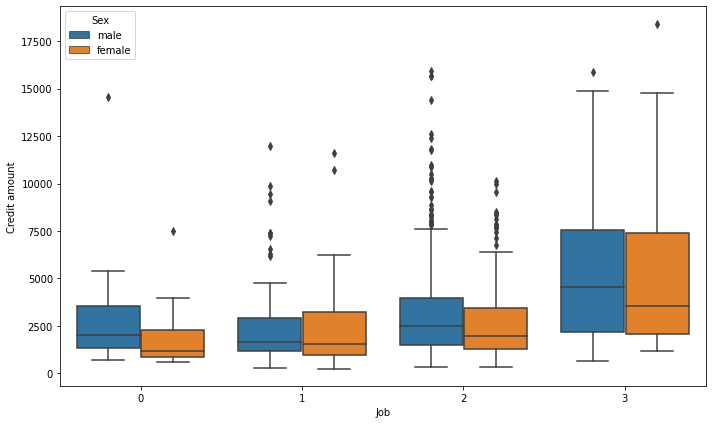

In [11]:
boxes("Job","Credit amount","Sex",r=0)

Dari segi kategori pekerjaan tidak ada perbedaan yang cukup besar antara laki-laki dan perempuan dalam jumlah kredit, namun kita bisa melihat bahwa pekerjaan kategori 3 cenderung mengambil jumlah kredit yang lebih besar.

### Clustering with K-Means

In [12]:
# one hot encoder
df=pd.get_dummies(df, columns=['Sex','Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True )
df.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_others,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_others,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
# Normalisasi data menggunakan StandarScaler
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

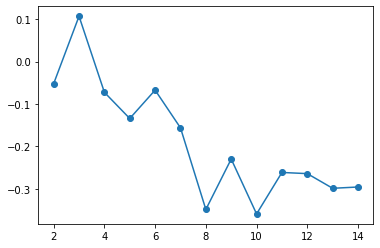

In [17]:
# Mencari jumlah cluster terbaik menggunakan Silhouete
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]
sc = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0)
    # inertias.append(kmeans.inertia_)
    preds = kmeans.fit_predict(Clus_dataSet)
    centers = kmeans.cluster_centers_
    score = silhouette_score(df, preds)
    sc.append(score)

plt.figure()
plt.plot(clusters_range,sc, marker='o')

Dengan meggunakan Silhouete Untuk menghitung jumlah cluster terbaik pada clustering K-Means berdasar grafik diatas diperoleh nilai maksimum grafik sebagai jumlah cluster yang akan dipilih yaitu 3 cluster.

In [18]:
# Cluster data menggunakan K-means
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 1 1 2 0 1 0 1 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 2 0 1 0 0 0 2 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 2 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 2 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 2 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 2 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 1 2 1 1 0 0 0 2 1 1 1 2
 1 0 0 0 0 0 0 0 2 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 2 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 2 2 1 0 0 2 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 2 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [19]:
# Tenetapkan label ke setiap baris di dataframe.
df["Clus_km"] = labels
df.head(5)

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_others,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_others,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Clus_km
0,67,2,1169,6,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,22,2,5951,48,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
# melihat karakteristik tiap cluster
df.groupby('Clus_km').mean()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_others,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_others,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,35.318681,1.813187,1890.082418,16.718407,0.664835,0.736264,0.189560,0.101648,0.162088,0.075549,0.056319,0.241758,0.406593,0.075549,0.300824,0.01511,0.061813,0.192308,0.326923,0.023352,0.005495
1,36.180556,2.097222,5742.245370,30.143519,0.745370,0.675926,0.157407,0.101852,0.226852,0.027778,0.027778,0.314815,0.361111,0.037037,0.412037,0.00463,0.050926,0.171296,0.162037,0.018519,0.013889
2,36.053571,2.339286,11695.589286,39.660714,0.803571,0.553571,0.125000,0.125000,0.285714,0.035714,0.017857,0.446429,0.357143,0.000000,0.517857,0.00000,0.053571,0.071429,0.125000,0.017857,0.089286


Berdasarkan rata-rata Cluster diperoleh:

Cluster 0 - rata-rata jumlah kredit yang lebih rendah, durasi pendek

Cluster 1 - rata-rata jumlah kredit sedang, durasi yang sedang, pelanggan paruh baya

Cluster 2 - rata-rata jumlah kredit tinggi, durasi lama, pelanggan lebih tua